<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/Lei_de_benford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

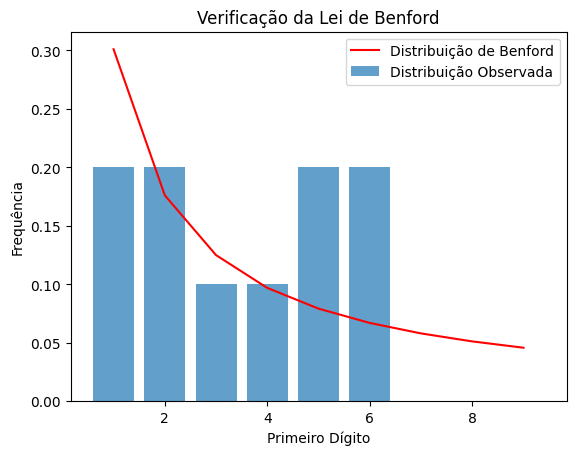

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def benford_first_digit(data):
    """
    Verifica a conformidade de um conjunto de dados com a Lei de Benford.

    Args:
    data (list): Lista de números para verificar.

    Returns:
    dict: Frequência dos primeiros dígitos.
    """
    first_digits = [int(str(num)[0]) for num in data if num > 0]
    digit_counts = np.bincount(first_digits, minlength=10)[1:]  # Ignore o índice 0
    total_counts = sum(digit_counts)

    benford_distribution = [np.log10(1 + 1 / d) for d in range(1, 10)]

    observed_distribution = digit_counts / total_counts

    return observed_distribution, benford_distribution

# Exemplo de conjunto de dados financeiros (pode ser substituído por dados reais)
data = [523.45, 234.56, 1234.56, 6789.00, 678.34, 123.45, 2345.67, 3456.78, 4567.89, 5678.90]

observed_distribution, benford_distribution = benford_first_digit(data)

# Plotar as distribuições
digits = range(1, 10)
plt.bar(digits, observed_distribution, alpha=0.7, label='Distribuição Observada')
plt.plot(digits, benford_distribution, 'r-', label='Distribuição de Benford')
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.title('Verificação da Lei de Benford')
plt.legend()
plt.show()


Chi-squared Statistic: 6.459193744258565
P-value: 0.5959373579140714


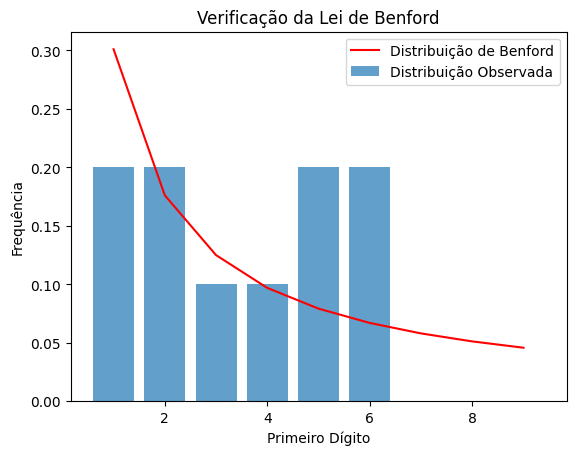

Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def benford_first_digit(data):
    """
    Verifica a conformidade de um conjunto de dados com a Lei de Benford.

    Args:
    data (list): Lista de números para verificar.

    Returns:
    dict: Frequência dos primeiros dígitos.
    """
    first_digits = [int(str(num)[0]) for num in data if num > 0]
    digit_counts = np.bincount(first_digits, minlength=10)[1:]  # Ignore o índice 0
    total_counts = sum(digit_counts)

    benford_distribution = [np.log10(1 + 1 / d) for d in range(1, 10)]
    expected_counts = [total_counts * prob for prob in benford_distribution]

    observed_distribution = digit_counts / total_counts

    return digit_counts, expected_counts, observed_distribution, benford_distribution

# Exemplo de conjunto de dados financeiros (pode ser substituído por dados reais)
data = [523.45, 234.56, 1234.56, 6789.00, 678.34, 123.45, 2345.67, 3456.78, 4567.89, 5678.90]

digit_counts, expected_counts, observed_distribution, benford_distribution = benford_first_digit(data)

# Cálculo do teste qui-quadrado
chi2_stat, p_value = chisquare(digit_counts, f_exp=expected_counts)

# Exibir resultados do teste
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotar as distribuições
digits = range(1, 10)
plt.bar(digits, observed_distribution, alpha=0.7, label='Distribuição Observada')
plt.plot(digits, benford_distribution, 'r-', label='Distribuição de Benford')
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.title('Verificação da Lei de Benford')
plt.legend()
plt.show()

# Interpretação dos resultados do teste qui-quadrado
alpha = 0.05
if p_value < alpha:
    print("Os dados se desviam significativamente da distribuição de Benford (possível fraude).")
else:
    print("Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).")


Chi-squared Statistic: 14.461138544838487
P-value: 0.0705099665965264


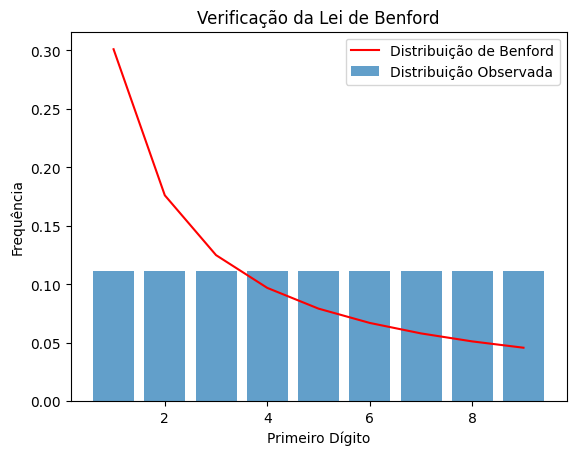

Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).


In [ ]:
#Exemplo em que se verifica uma fraude
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def benford_first_digit(data):
    """
    Verifica a conformidade de um conjunto de dados com a Lei de Benford.

    Args:
    data (list): Lista de números para verificar.

    Returns:
    dict: Frequência dos primeiros dígitos.
    """
    first_digits = [int(str(abs(num))[0]) for num in data if num != 0]
    digit_counts = np.bincount(first_digits, minlength=10)[1:]  # Ignore o índice 0
    total_counts = sum(digit_counts)

    benford_distribution = [np.log10(1 + 1 / d) for d in range(1, 10)]
    expected_counts = [total_counts * prob for prob in benford_distribution]

    observed_distribution = digit_counts / total_counts

    return digit_counts, expected_counts, observed_distribution, benford_distribution

# Conjunto de dados financeiros manipulados para claramente não seguir a Lei de Benford
data = [
    1111.23, 1111.45, 1111.67, 2222.89, 2222.10, 2222.11, 3333.12, 3333.13, 3333.14,
    4444.15, 4444.16, 4444.17, 5555.18, 5555.19, 5555.20, 6666.21, 6666.22, 6666.23,
    7777.24, 7777.25, 7777.26, 8888.27, 8888.28, 8888.29, 9999.30, 9999.31, 9999.32,
    1234.56, 2345.67, 3456.78, 4567.89, 5678.90, 6789.01, 7890.12, 8901.23, 9012.34
]

digit_counts, expected_counts, observed_distribution, benford_distribution = benford_first_digit(data)

# Cálculo do teste qui-quadrado
chi2_stat, p_value = chisquare(digit_counts, f_exp=expected_counts)

# Exibir resultados do teste
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotar as distribuições
digits = range(1, 10)
plt.bar(digits, observed_distribution, alpha=0.7, label='Distribuição Observada')
plt.plot(digits, benford_distribution, 'r-', label='Distribuição de Benford')
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.title('Verificação da Lei de Benford')
plt.legend()
plt.show()

# Interpretação dos resultados do teste qui-quadrado
alpha = 0.05
if p_value < alpha:
    print("Os dados se desviam significativamente da distribuição de Benford (possível fraude).")
else:
    print("Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).")


Chi-squared Statistic: 38.37707523772159
P-value: 6.411757002257801e-06


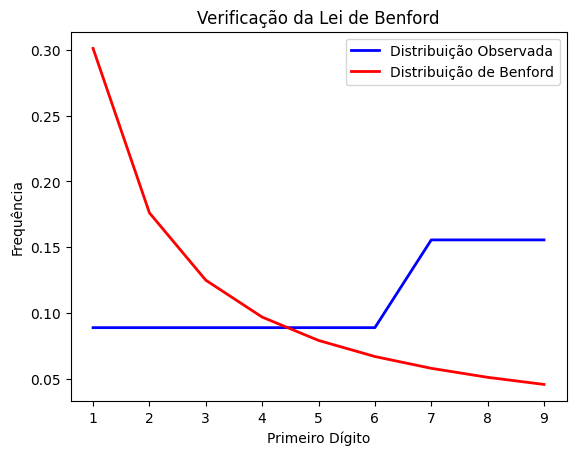

Os dados se desviam significativamente da distribuição de Benford (possível fraude).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def benford_first_digit(data):
    """
    Verifica a conformidade de um conjunto de dados com a Lei de Benford.

    Args:
    data (list): Lista de números para verificar.

    Returns:
    tuple: Contagens dos dígitos observados, contagens esperadas, distribuição observada e distribuição de Benford.
    """
    first_digits = [int(str(abs(num))[0]) for num in data if num != 0]
    digit_counts = np.bincount(first_digits, minlength=10)[1:]  # Ignore o índice 0
    total_counts = sum(digit_counts)

    benford_distribution = [np.log10(1 + 1 / d) for d in range(1, 10)]
    expected_counts = [total_counts * prob for prob in benford_distribution]

    observed_distribution = digit_counts / total_counts

    return digit_counts, expected_counts, observed_distribution, benford_distribution

# Gerar um conjunto de dados de 2000 registros que não segue a Lei de Benford
data = [
    1111.23, 1111.45, 1111.67, 2222.89, 2222.10, 2222.11, 3333.12, 3333.13, 3333.14,
    7777.24, 7777.25, 7777.26, 8888.27, 8888.28, 8888.29, 9999.30, 9999.31, 9999.32,
    1234.56, 2345.67, 3456.78, 4567.89, 5678.90, 6789.01, 7890.12, 8901.23, 9012.34,
    4444.15, 4444.16, 4444.17, 5555.18, 5555.19, 5555.20, 6666.21, 6666.22, 6666.23,
    7777.24, 7777.25, 7777.26, 8888.27, 8888.28, 8888.29, 9999.30, 9999.31, 9999.32,
]

# Calcular distribuições
digit_counts, expected_counts, observed_distribution, benford_distribution = benford_first_digit(data)

# Cálculo do teste qui-quadrado
chi2_stat, p_value = chisquare(digit_counts, f_exp=expected_counts)

# Exibir resultados do teste
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotar as distribuições
digits = range(1, 10)
plt.plot(digits, observed_distribution, 'b-', label='Distribuição Observada', linewidth=2)
plt.plot(digits, benford_distribution, 'r-', label='Distribuição de Benford', linewidth=2)
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.title('Verificação da Lei de Benford')
plt.legend()
plt.show()

# Interpretação dos resultados do teste qui-quadrado
alpha = 0.05
if p_value < alpha:
    print("Os dados se desviam significativamente da distribuição de Benford (possível fraude).")
else:
    print("Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).")


In [23]:
#Importar dados de exportações do BC para análise da lei de benford

import pandas as pd

# Importar os dados do arquivo bcdata.csv e transformar em um dataframe
dados = pd.read_csv('bcdata2.csv', sep = ';')

# Converte a coluna data para o formato datetime utilizado em dataframes
dados['data'] = pd.to_datetime(dados['data'])

# Definir a coluna data como index
dados = dados.set_index('data')

#Exibe os dados para análise
print(dados.head())


            valor
data             
1995-01-01   10,8
1995-01-02   70,6
1995-01-03  211,6
1995-01-04  250,0
1995-01-05   -9,2


In [27]:
# Monta uma lista com os dados da coluna "valor" no dataframe dados para análise na lei de Benford
# Os valores deverão ser do tipo float

lista_valores = [float(valor.replace(',', '.')) for valor in dados["valor"]]
lista_valores[0:15]


[102.3,
 45.2,
 87.3,
 62.3,
 220.7,
 122.7,
 198.9,
 342.5,
 169.3,
 80.1,
 40.5,
 62.0,
 39.9,
 43.5,
 14.0]

O valor de digit_counts: [112  66  42  33  25  23  22  20  10]
Chi-squared Statistic: 3.6851028068305496
P-value: 0.8843588826887454


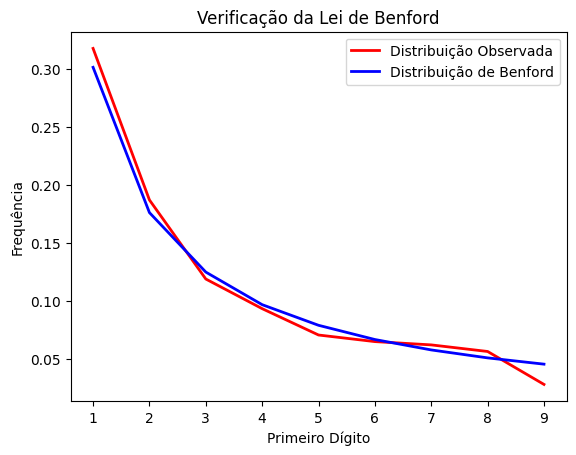

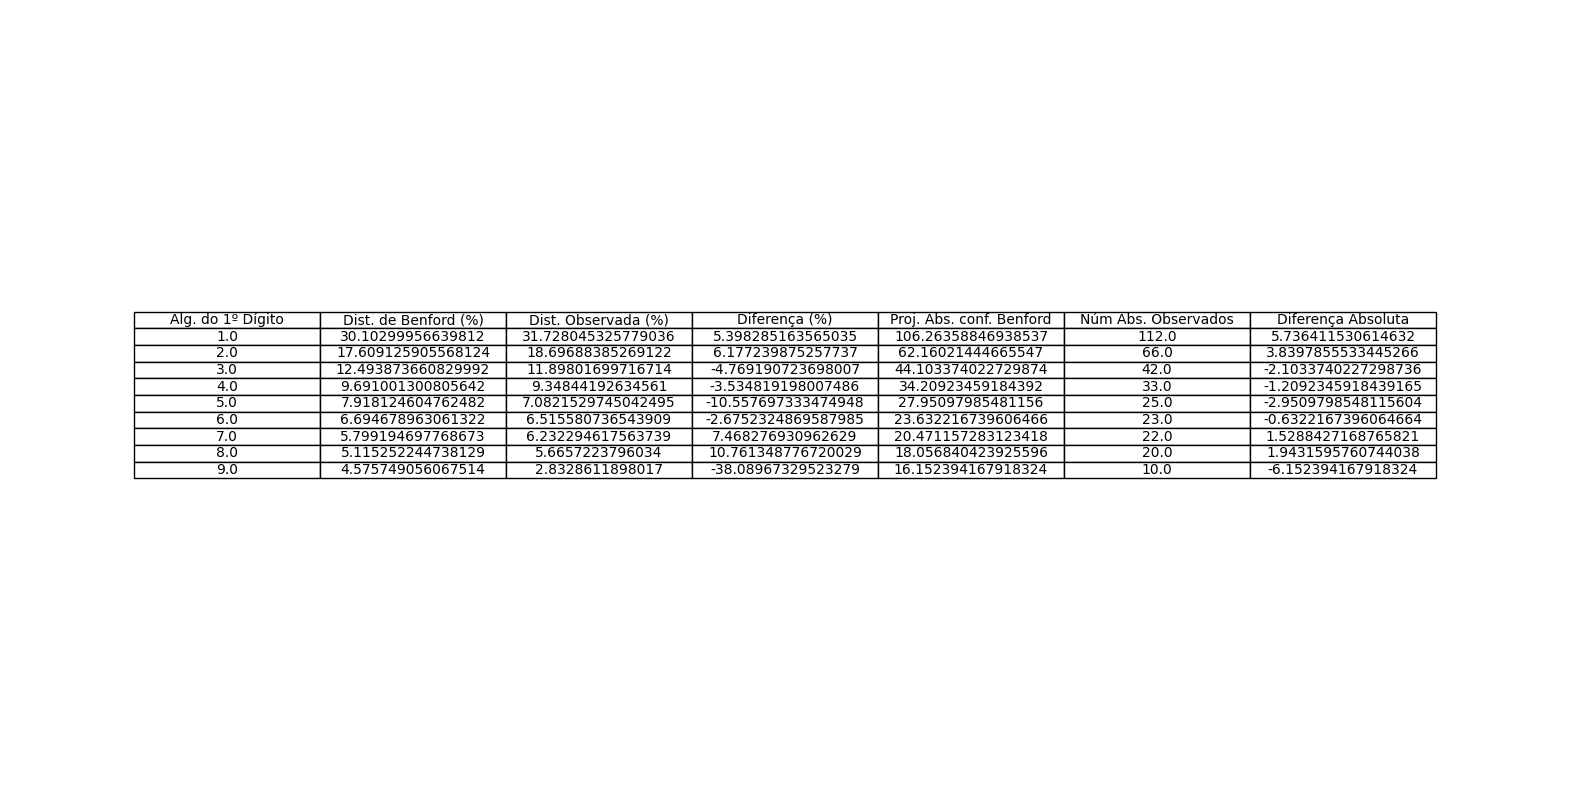

Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import pandas as pd

def benford_first_digit(data):
    """
    Verifica a conformidade de um conjunto de dados com a Lei de Benford.

    Args:
    data (list): Lista de números para verificar.

    Returns:
    tuple: Contagens dos dígitos observados, contagens esperadas, distribuição observada e distribuição de Benford.
    """
    first_digits = [int(str(abs(num))[0]) for num in data if num != 0]
    digit_counts = np.bincount(first_digits, minlength=10)[1:] # Ignore o índice 0
    print(f"O valor de digit_counts: {digit_counts}")
    total_counts = sum(digit_counts)

    benford_distribution = [np.log10(1 + 1 / d) for d in range(1, 10)]
    expected_counts = [total_counts * prob for prob in benford_distribution]

    observed_distribution = digit_counts / total_counts

    return digit_counts, expected_counts, observed_distribution, benford_distribution

data = lista_valores

# Calcular distribuições
digit_counts, expected_counts, observed_distribution, benford_distribution = benford_first_digit(data)

# Cálculo do teste qui-quadrado
chi2_stat, p_value = chisquare(digit_counts, f_exp=expected_counts)

# Exibir resultados do teste
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Plotar as distribuições
digits = range(1, 10)
plt.plot(digits, observed_distribution, 'r-', label='Distribuição Observada', linewidth=2)
plt.plot(digits, benford_distribution, 'b-', label='Distribuição de Benford', linewidth=2)
plt.xlabel('Primeiro Dígito')
plt.ylabel('Frequência')
plt.title('Verificação da Lei de Benford')
plt.legend()
plt.show()

# Calcular diferenças percentuais e absolutas
difference_percent = [(obs - exp) / exp * 100 for obs, exp in zip(observed_distribution, benford_distribution)]
difference_absolute = [obs - exp for obs, exp in zip(digit_counts, expected_counts)]

# Criar um DataFrame para exibir os resultados
results_df = pd.DataFrame({
    'Alg. do 1º Dígito': range(1, 10),
    'Dist. de Benford (%)': [prob * 100 for prob in benford_distribution],
    'Dist. Observada (%)': [obs * 100 for obs in observed_distribution],
    'Diferença (%)': difference_percent,
    'Proj. Abs. conf. Benford': expected_counts,
    'Núm Abs. Observados': digit_counts,
    'Diferença Absoluta': difference_absolute
})

# Plotar a tabela de diferenças
fig, ax = plt.subplots(figsize=(20, 10))  # Tamanho da figura
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Ajustar a largura das colunas
for key, cell in table.get_celld().items():
    cell.set_width(0.12)

plt.show()

# Interpretação dos resultados do teste qui-quadrado
alpha = 0.05
if p_value < alpha:
    print("Os dados se desviam significativamente da distribuição de Benford (possível fraude).")
else:
    print("Os dados não se desviam significativamente da distribuição de Benford (sem evidência de fraude).")
